# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

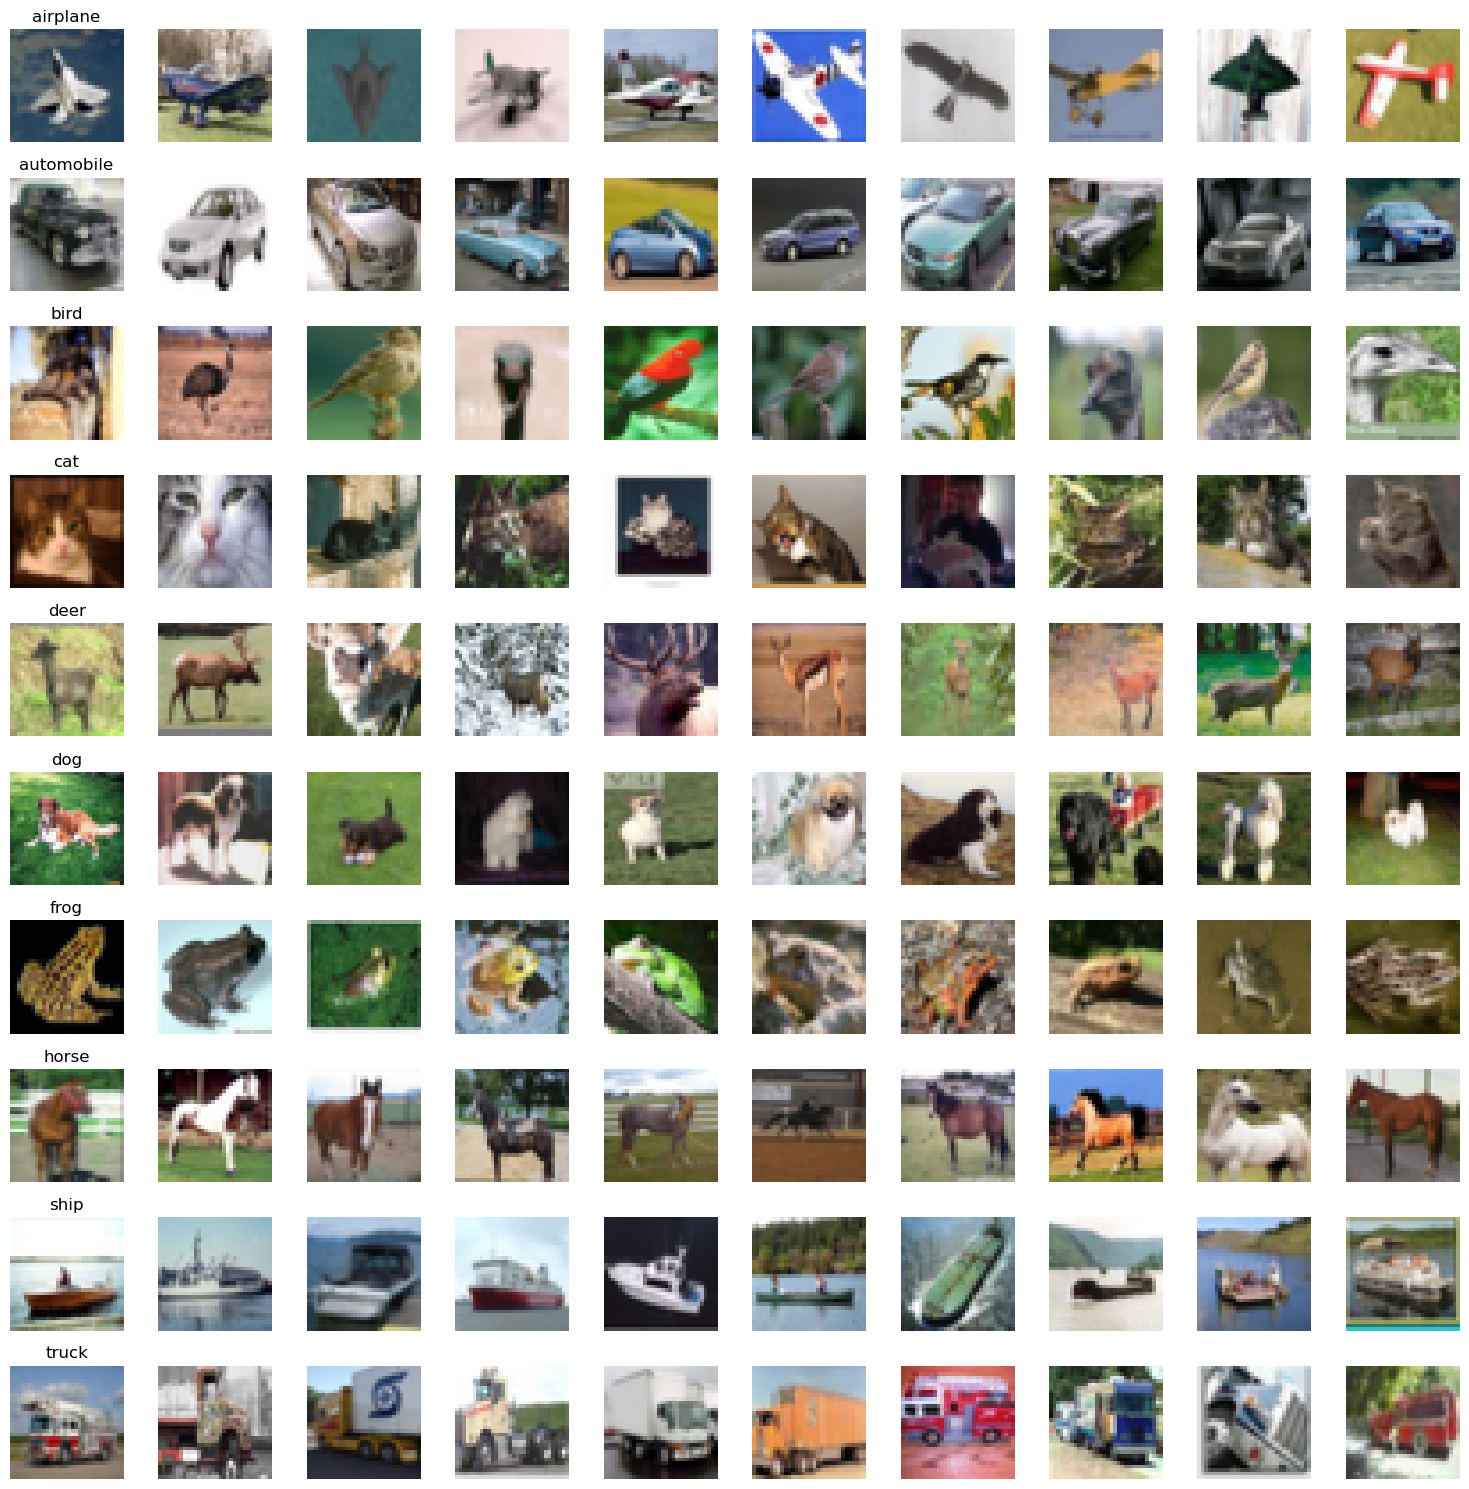

Training data shape: (50000, 32, 32, 3)
Training labels shape (one-hot): (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape (one-hot): (10000, 10)


In [8]:
# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Visualize 10 random samples from each class
plt.figure(figsize=(15, 15))
samples_per_class = 10
for class_idx, class_name in enumerate(class_names):
    class_images = x_train[y_train.flatten() == class_idx]
    random_indices = np.random.choice(len(class_images), samples_per_class, replace=False)
    for i, img_idx in enumerate(random_indices):
        plt.subplot(10, 10, class_idx * samples_per_class + i + 1)
        plt.imshow(class_images[img_idx])
        plt.axis('off')
        if i == 0:
            plt.title(class_name)
plt.tight_layout()
plt.show()

# Confirm shapes of the data
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape (one-hot): {y_train_one_hot.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape (one-hot): {y_test_one_hot.shape}")


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [9]:
from keras.backend import clear_session
clear_session()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.backend import clear_session

# Clear previous models from memory
clear_session()

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [11]:
# Compile the model with SGD optimizer and categorical crossentropy loss
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 50 epochs with a batch size of 512
history = model.fit(x_train, y_train_one_hot, epochs=50, batch_size=512, validation_data=(x_test, y_test_one_hot))


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.1339 - loss: 2.2786 - val_accuracy: 0.2317 - val_loss: 2.1714
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.2484 - loss: 2.1347 - val_accuracy: 0.2828 - val_loss: 2.0410
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.2879 - loss: 2.0146 - val_accuracy: 0.3130 - val_loss: 1.9658
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.3172 - loss: 1.9462 - val_accuracy: 0.3187 - val_loss: 1.9246
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.3391 - loss: 1.8986 - val_accuracy: 0.3489 - val_loss: 1.8755
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.3501 - loss: 1.8682 - val_accuracy: 0.3576 - val_loss: 1.8519
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.3590 - loss: 1.8487 - val_accuracy: 0.3601 - val_loss: 1.8259
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.3698 - loss: 1.8146 - val_accurac

*   Plot the cross entropy loss curve and the accuracy curve

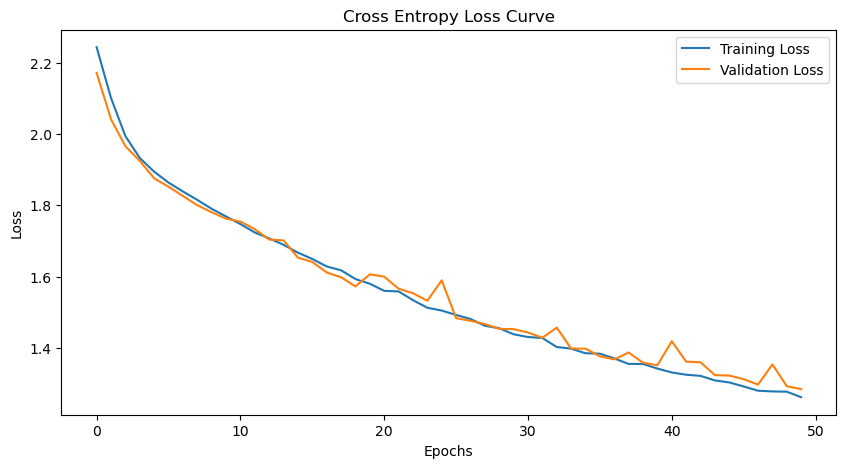

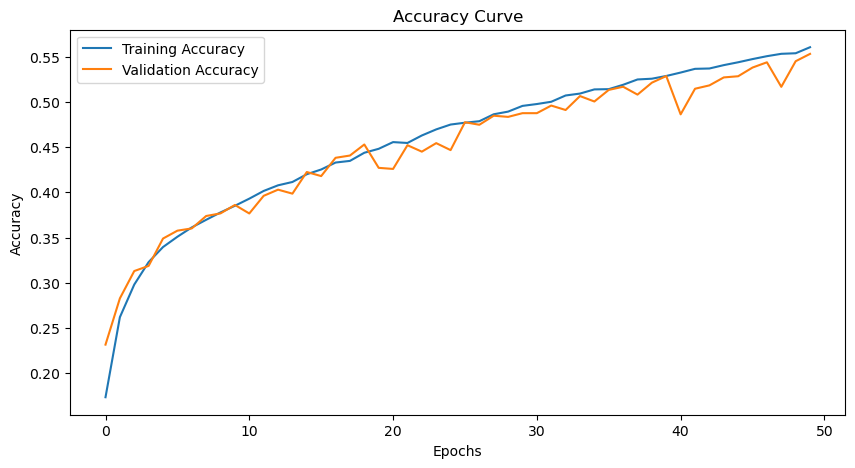

In [12]:
# Plot cross entropy loss curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [13]:
from keras.backend import clear_session
clear_session()

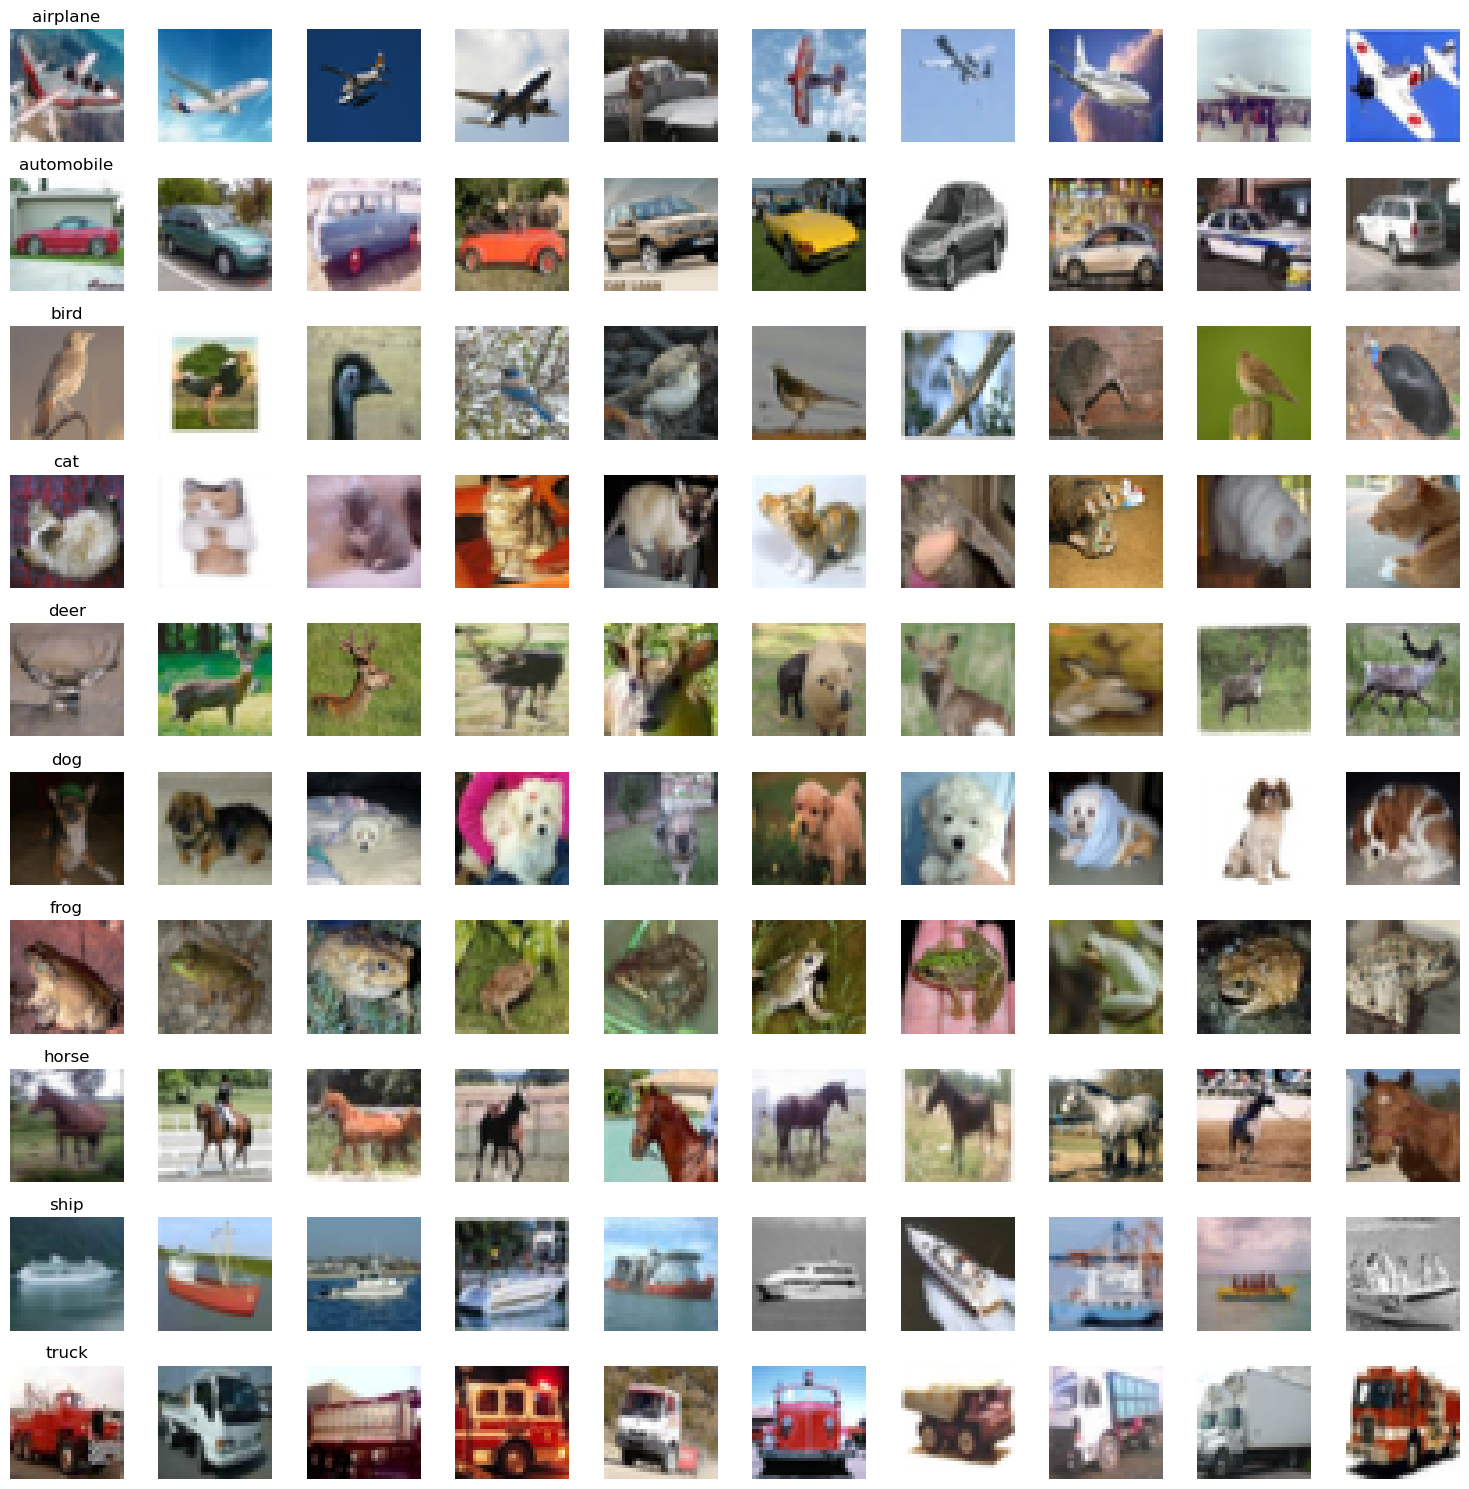

Training data shape: (50000, 32, 32, 3)
Training labels shape (one-hot): (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape (one-hot): (10000, 10)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.backend import clear_session

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Visualize 10 random samples from each class
plt.figure(figsize=(15, 15))
samples_per_class = 10
for class_idx, class_name in enumerate(class_names):
    class_images = x_train[y_train.flatten() == class_idx]
    random_indices = np.random.choice(len(class_images), samples_per_class, replace=False)
    for i, img_idx in enumerate(random_indices):
        plt.subplot(10, 10, class_idx * samples_per_class + i + 1)
        plt.imshow(class_images[img_idx])
        plt.axis('off')
        if i == 0:
            plt.title(class_name)
plt.tight_layout()
plt.show()

# Confirm shapes of the data
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape (one-hot): {y_train_one_hot.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape (one-hot): {y_test_one_hot.shape}")

# Clear previous models from memory
clear_session()

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [15]:
from tensorflow.keras.optimizers import SGD

# Compile the model with SGD optimizer and categorical crossentropy loss
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 50 epochs with a batch size of 512
history = model.fit(x_train, y_train_one_hot, epochs=50, batch_size=512, validation_data=(x_test, y_test_one_hot))

# Display final training and validation accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 143ms/step - accuracy: 0.1643 - loss: 2.2620 - val_accuracy: 0.2398 - val_loss: 2.1384
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - accuracy: 0.2703 - loss: 2.1019 - val_accuracy: 0.3106 - val_loss: 2.0096
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - accuracy: 0.3115 - loss: 1.9854 - val_accuracy: 0.3178 - val_loss: 1.9359
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.3293 - loss: 1.9264 - val_accuracy: 0.3347 - val_loss: 1.8967
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.3457 - loss: 1.8805 - val_accuracy: 0.3460 - val_loss: 1.8653
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - accuracy: 0.3578 - loss: 1.8505 - val_accuracy: 0.3542 - val_loss: 1.8346
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 161ms/step - accuracy: 0.3624 - loss: 1.8268 - val_accuracy: 0.3710 - val_loss: 1.8015
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - accuracy: 0.3755 - loss: 1.7947 - val_accu

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

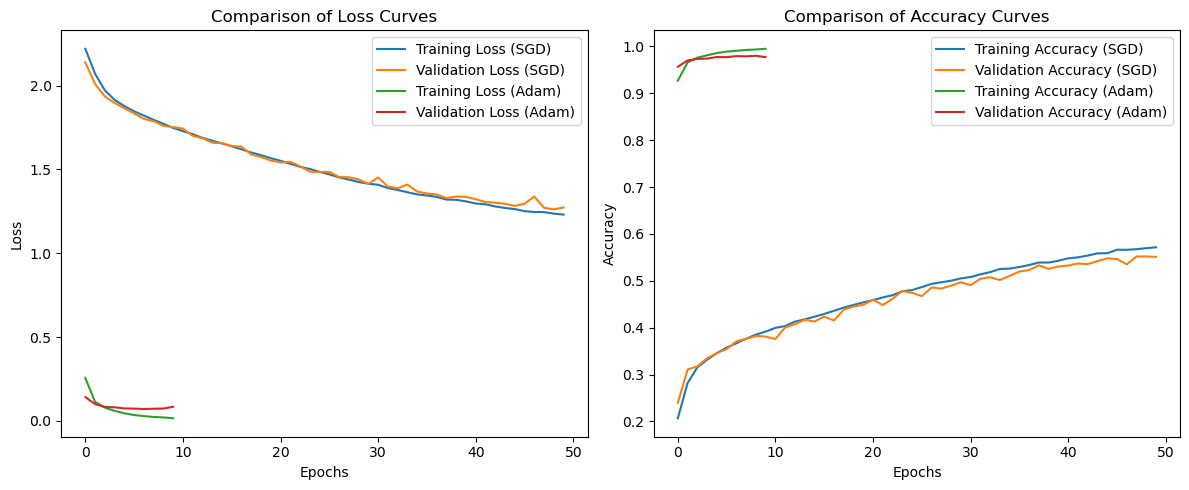

In [30]:
# Plot loss curves for both models
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss (SGD)')
plt.plot(history.history['val_loss'], label='Validation Loss (SGD)')
plt.plot(history_adam.history['loss'], label='Training Loss (Adam)')
plt.plot(history_adam.history['val_loss'], label='Validation Loss (Adam)')
plt.title('Comparison of Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy curves for both models
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy (SGD)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (SGD)')
plt.plot(history_adam.history['accuracy'], label='Training Accuracy (Adam)')
plt.plot(history_adam.history['val_accuracy'], label='Validation Accuracy (Adam)')
plt.title('Comparison of Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Comment on the observation**

*Observation:*
*- The Adam-optimized model generally converges faster and may achieve higher accuracy, whereas the SGD-optimized model might show a steadier but slower improvement.*
*- If the deeper model (using Adam) shows better validation accuracy and lower validation loss, it indicates a more powerful feature extraction.*
*- However, if the deeper model overfits, the validation curves will diverge from training curves after some epochs.*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


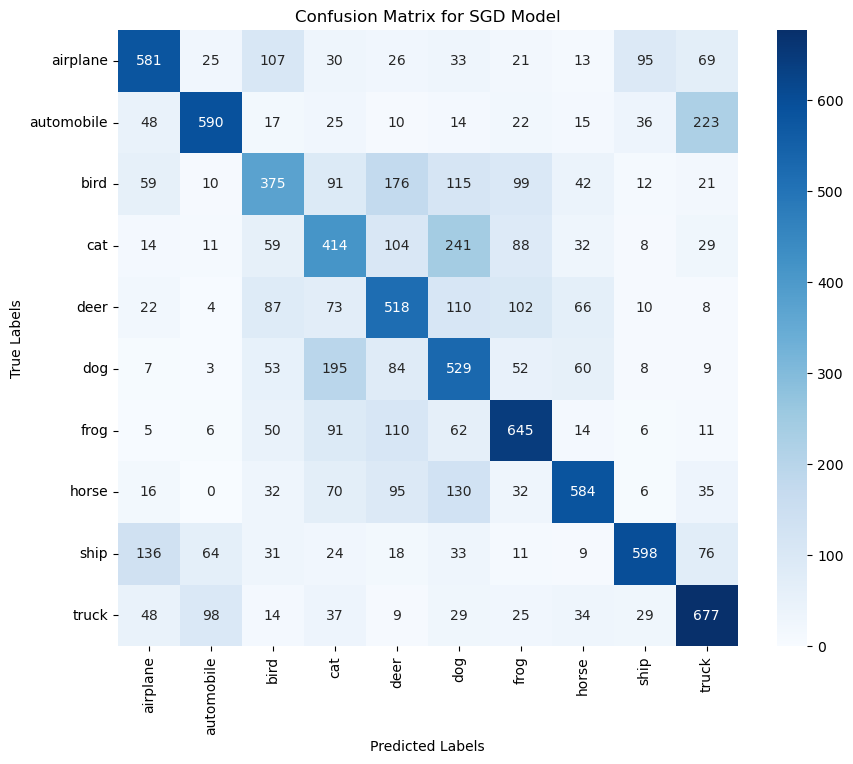

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the labels for the test set using the SGD model
y_pred_sgd = model.predict(x_test)
y_pred_classes_sgd = np.argmax(y_pred_sgd, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes_sgd)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for SGD Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**Comment here :**

*Observation:*
*- Diagonal values indicate correct classifications, while off-diagonal values show misclassifications.*
*- Classes with higher confusion might indicate similar features, e.g., 'cat' and 'dog'.*
*- Analyzing these confusions can guide further model improvements.")*

...

*    Print the test accuracy for the trained model.

In [28]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the pixel values to the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Assuming 'model' is already trained, evaluate it on the test dataset
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 2s - 5ms/step - accuracy: 0.5511 - loss: 1.2733
Test accuracy: 0.5511000156402588


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [31]:
from keras.backend import clear_session
clear_session()

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Clear any previous session to start fresh
from keras.backend import clear_session
clear_session()

# Initialize the model
model = Sequential()

# First block: Two convolutional layers with 64 filters (3x3) and max pooling
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second block: Two convolutional layers with 128 filters (3x3) and max pooling
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third block: Two convolutional layers with 256 filters (3x3) and max pooling
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the previous block
model.add(Flatten())

# Add a dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the output classification layer (use softmax for multi-class classification)
model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for classification, change if needed

# Print the model summary to see the architecture
model.summary()


c:\Users\deept\anaconda3\envs\IronhackCamp\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

c:\Users\deept\anaconda3\envs\IronhackCamp\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 488s 5s/step - accuracy: 0.1063 - loss: 2.3011 - val_accuracy: 0.1221 - val_loss: 2.2977
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 410s 4s/step - accuracy: 0.1271 - loss: 2.2966 - val_accuracy: 0.1195 - val_loss: 2.2918
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 412s 4s/step - accuracy: 0.1316 - loss: 2.2896 - val_accuracy: 0.1338 - val_loss: 2.2791
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 416s 4s/step - accuracy: 0.1573 - loss: 2.2722 - val_accuracy: 0.1850 - val_loss: 2.2402
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 376s 4s/step - accuracy: 0.2028 - loss: 2.2153 - val_accuracy: 0.2731 - val_loss: 2.1076
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 347s 4s/step - accuracy: 0.2447 - loss: 2.1051 - val_accuracy: 0.2793 - val_loss: 2.0097
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 339s 3s/step - accuracy: 0.2716 - loss: 2.0209 - val_accuracy: 0.2808 - val_loss: 1.9960
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 337s 3s/step - accuracy: 0.2877 - loss: 1.9777 - val_accuracy: 0.3125 - v

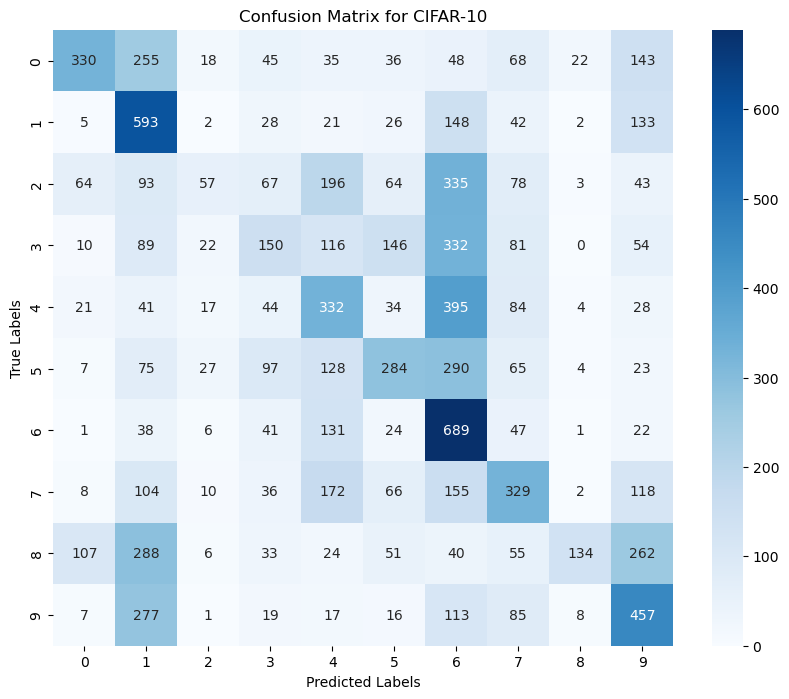

In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras import backend as K

# Clear previous sessions to avoid memory issues
K.clear_session()

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to the [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Recreate the VGG-like model
model = Sequential()

# First block: Two convolutional layers with 64 filters (3x3) and max pooling
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second block: Two convolutional layers with 128 filters (3x3) and max pooling
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third block: Two convolutional layers with 256 filters (3x3) and max pooling
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the previous block
model.add(Flatten())

# Add a dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the output classification layer (use softmax for multi-class classification)
model.add(Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

# Compile the model using SGD optimizer and categorical crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

# Train the model for 10 epochs with a batch size of 512
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

# Predict the output for the test dataset
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test back from one-hot encoding to integer labels for comparison
y_test_classes = np.argmax(y_test, axis=1)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix for CIFAR-10')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions add non-linearity to neural networks, enabling them to learn complex patterns. Without them, networks would behave like linear models.

_

2 - Key Differences between sigmoid and softmax:

Sigmoid: Outputs values between 0 and 1, used for binary classification.
Softmax: Produces a probability distribution summing to 1, used for multi-class classification.


_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Key Differences between categorical crossentropy and binary crossentropy loss:

Categorical crossentropy: For multi-class classification with one-hot encoded labels.

Binary crossentropy: For binary or multi-label classification.

_
